In [1]:

import seaborn as sns
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



In [3]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
df[df.duplicated()]


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [14]:
df.drop_duplicates(keep='first',inplace=True)


In [16]:
df.shape

(302, 14)

In [18]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [19]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


# ***Data Visualization***

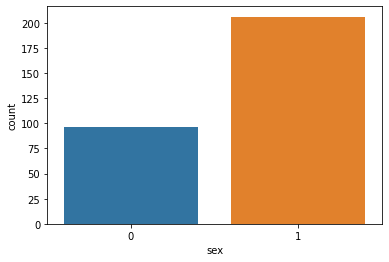

In [22]:
sns.countplot(data=df, x="sex")
plt.show()

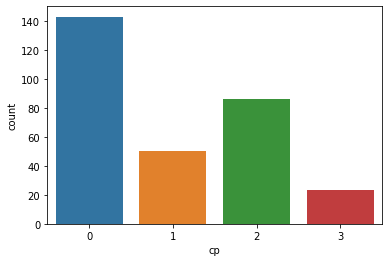

In [23]:
sns.countplot(data=df, x="cp")
plt.show()

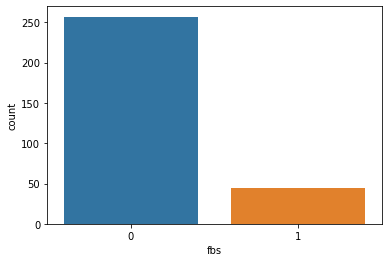

In [25]:
sns.countplot(data=df, x="fbs")
plt.show()



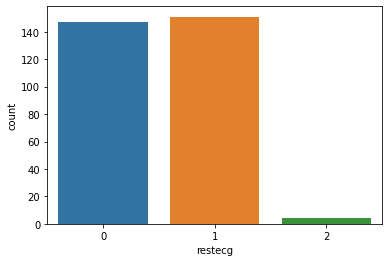

In [26]:
sns.countplot(data=df, x="restecg")
plt.show()



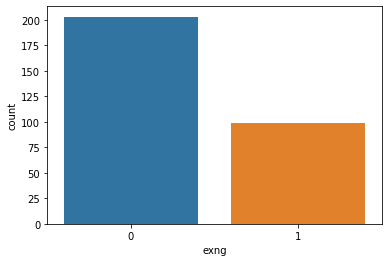

In [27]:
sns.countplot(data=df, x="exng")
plt.show()


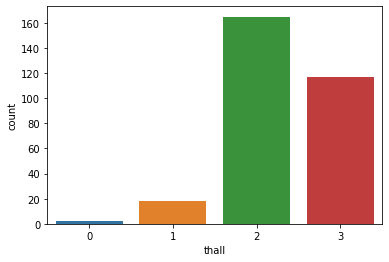

In [28]:
sns.countplot(data=df, x="thall")
plt.show()


<Figure size 720x720 with 0 Axes>

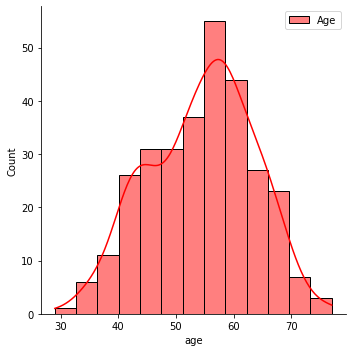

In [29]:
plt.figure(figsize=(10,10))
sns.displot(df['age'], color="red", label="Age", kde= True)
plt.legend()

<Figure size 1440x1440 with 0 Axes>

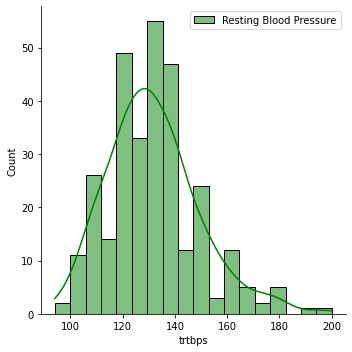

In [30]:
plt.figure(figsize=(20,20))
sns.displot(df['trtbps'] , color="green", label="Resting Blood Pressure", kde= True)
plt.legend()

# **Data preprocessing**

In [40]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)


In [43]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [44]:
x_train,x_test

(array([[-1.4186261 ,  0.98544689, -0.55988902, ..., -0.61492051,
         -0.70674006, -0.49876142],
        [-1.4186261 ,  0.98544689,  0.81698091, ..., -0.61492051,
          0.29516791, -0.49876142],
        [ 0.70490738,  0.98544689,  0.47276343, ...,  0.99590387,
         -0.70674006, -0.49876142],
        ...,
        [ 0.70490738,  1.94307874, -0.67462818, ..., -0.61492051,
         -0.70674006,  1.1478345 ],
        [ 0.70490738,  0.98544689,  0.35802427, ...,  0.99590387,
         -0.70674006, -0.49876142],
        [ 0.70490738,  0.98544689,  0.01380679, ...,  0.99590387,
          1.29707587,  1.1478345 ]]),
 array([[ 0.70490738,  0.02781503, -0.67462818,  0.65089023, -0.40527917,
         -0.97525383, -1.96657306, -0.6983225 ,  0.27236593, -0.61492051,
          0.29516791,  1.1478345 ],
        [ 0.70490738,  1.94307874,  2.19385084, -0.36856884, -0.40527917,
         -0.97525383,  0.23525787, -0.6983225 , -0.39657867, -0.61492051,
         -0.70674006,  1.1478345 ],
     

**1. Logistic Regression**

In [46]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
predicted=lr.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")



Confusion Matrix : 
 [[23  4]
 [ 3 31]]
The accuracy of Logistic Regression is :  88.52459016393442 %


**2.Gaussian Naive Bayes**

In [54]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
predicted = gnb.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")

Confusion Matrix : 
 [[24  3]
 [ 4 30]]
The accuracy of Gaussian Naive Bayes model is :  88.52459016393442 %


**3.Bernoulli Naive Bayes**

In [55]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
predicted = bnb.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")

Confusion Matrix : 
 [[23  4]
 [ 4 30]]
The accuracy of Gaussian Naive Bayes model is :  86.88524590163934 %


**4.Support Vector Machine**

In [56]:
svc = SVC()
svc.fit(x_train, y_train)
predicted = svc.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print("The accuracy of SVM is : ", accuracy_score(y_test, predicted)*100, "%")



Confusion Matrix : 
 [[25  2]
 [ 3 31]]
The accuracy of SVM is :  91.80327868852459 %


**5.Random Forest**

In [60]:
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)  
rfr.fit(x_train, y_train)  
predicted = rfr.predict(x_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")


The accuracy of Random Forest is :  85.24590163934425 %


**6.K Nearest Neighbours**

In [61]:
  
knn = KNeighborsClassifier(n_neighbors = 2)  
knn.fit(x_train, y_train)
predicted = knn.predict(x_test)
  
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")

  


Confusion Matrix : 
 [[26  1]
 [ 9 25]]
The accuracy of KNN is :  83.60655737704919 %


**Optimizing the KNN**

Text(0, 0.5, 'Error Rate')

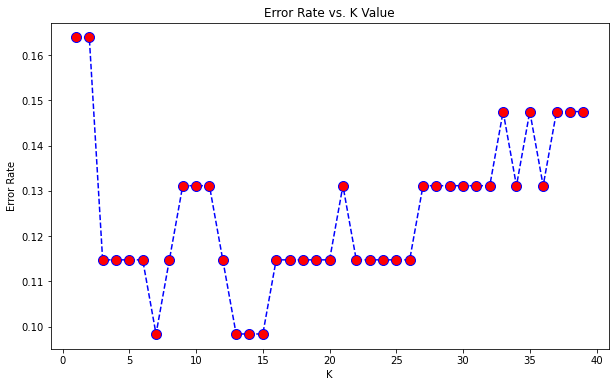

In [62]:
error_rate = []
  
for i in range(1, 40):
      
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train, y_train)
    pred_i = model.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
  


plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')



With k=7 as it hovers after that

In [63]:
knn = KNeighborsClassifier(n_neighbors = 7)
  
knn.fit(x_train, y_train)
predicted = knn.predict(x_test)
  
print('Confusion Matrix :')
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))

print()
print()
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")


Confusion Matrix :
[[25  2]
 [ 4 30]]


The accuracy of KNN is :  90.1639344262295 %
